In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

from ggplot import *

C:\Users\enterprise\Anaconda2\envs\py35\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\enterprise\Anaconda2\envs\py35\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
data = pd.read_csv('C:/Users/enterprise/Google Drive/fake_news_resources/raw_data/200_w2v.csv')

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,class
0,0.079363,0.056652,0.131635,0.181985,-0.077590,0.163969,0.268569,0.096867,0.146928,0.132340,...,-0.238851,0.433775,-0.159278,0.119939,-0.167914,0.345973,0.027744,-0.221527,0.060562,0
1,0.187514,-0.117532,0.212321,0.169369,-0.068645,0.104395,0.196029,0.181140,0.429525,-0.028684,...,-0.113229,0.331033,0.204344,0.054274,0.066674,0.172758,-0.030026,-0.151404,0.055431,0
2,0.063562,0.099867,0.105196,0.008667,-0.120491,-0.043890,0.248002,0.053538,0.252559,0.160082,...,-0.214137,0.446417,-0.151694,0.109905,-0.339849,0.238901,-0.079800,-0.228725,0.138899,0
3,0.036314,0.108824,0.067064,0.141104,-0.043921,0.111751,0.279939,0.103269,0.112140,0.143998,...,-0.267979,0.445234,-0.234239,0.174508,-0.199214,0.374246,0.053308,-0.271306,0.116270,0
4,0.124340,-0.062889,0.128010,0.175044,-0.061351,0.096961,0.193578,0.174761,0.272709,0.017073,...,-0.147236,0.336928,0.074645,0.063666,0.006912,0.136749,0.043222,-0.164594,0.051087,0


In [4]:
X = data.drop(['class'], 1)
y = data[['class']]

In [5]:
X_array = X.values
y_array = y.values

In [6]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)

In [7]:
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1488 samples in 0.016s...
[t-SNE] Computed neighbors for 1488 samples in 0.828s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1488
[t-SNE] Computed conditional probabilities for sample 1488 / 1488
[t-SNE] Mean sigma: 0.440202
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.869225
[t-SNE] KL divergence after 500 iterations: 1.265022


In [8]:
df_tsne = data.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

In [9]:
df_tsne.head()

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,class,x-tsne,y-tsne
0,0.079363,0.056652,0.131635,0.181985,-0.077590,0.163969,0.268569,0.096867,0.146928,0.132340,...,-0.159278,0.119939,-0.167914,0.345973,0.027744,-0.221527,0.060562,0,-3.931759,6.112464
1,0.187514,-0.117532,0.212321,0.169369,-0.068645,0.104395,0.196029,0.181140,0.429525,-0.028684,...,0.204344,0.054274,0.066674,0.172758,-0.030026,-0.151404,0.055431,0,9.764292,36.645939
2,0.063562,0.099867,0.105196,0.008667,-0.120491,-0.043890,0.248002,0.053538,0.252559,0.160082,...,-0.151694,0.109905,-0.339849,0.238901,-0.079800,-0.228725,0.138899,0,-7.276780,10.698333
3,0.036314,0.108824,0.067064,0.141104,-0.043921,0.111751,0.279939,0.103269,0.112140,0.143998,...,-0.234239,0.174508,-0.199214,0.374246,0.053308,-0.271306,0.116270,0,-4.224056,5.928730
4,0.124340,-0.062889,0.128010,0.175044,-0.061351,0.096961,0.193578,0.174761,0.272709,0.017073,...,0.074645,0.063666,0.006912,0.136749,0.043222,-0.164594,0.051087,0,14.198249,36.827908


In [10]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='class') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")

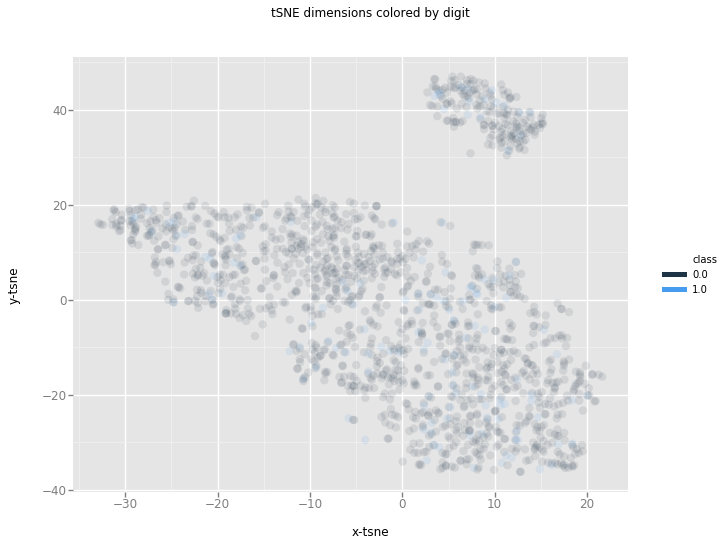

<ggplot: (23346026458)>

In [11]:
chart

In [12]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

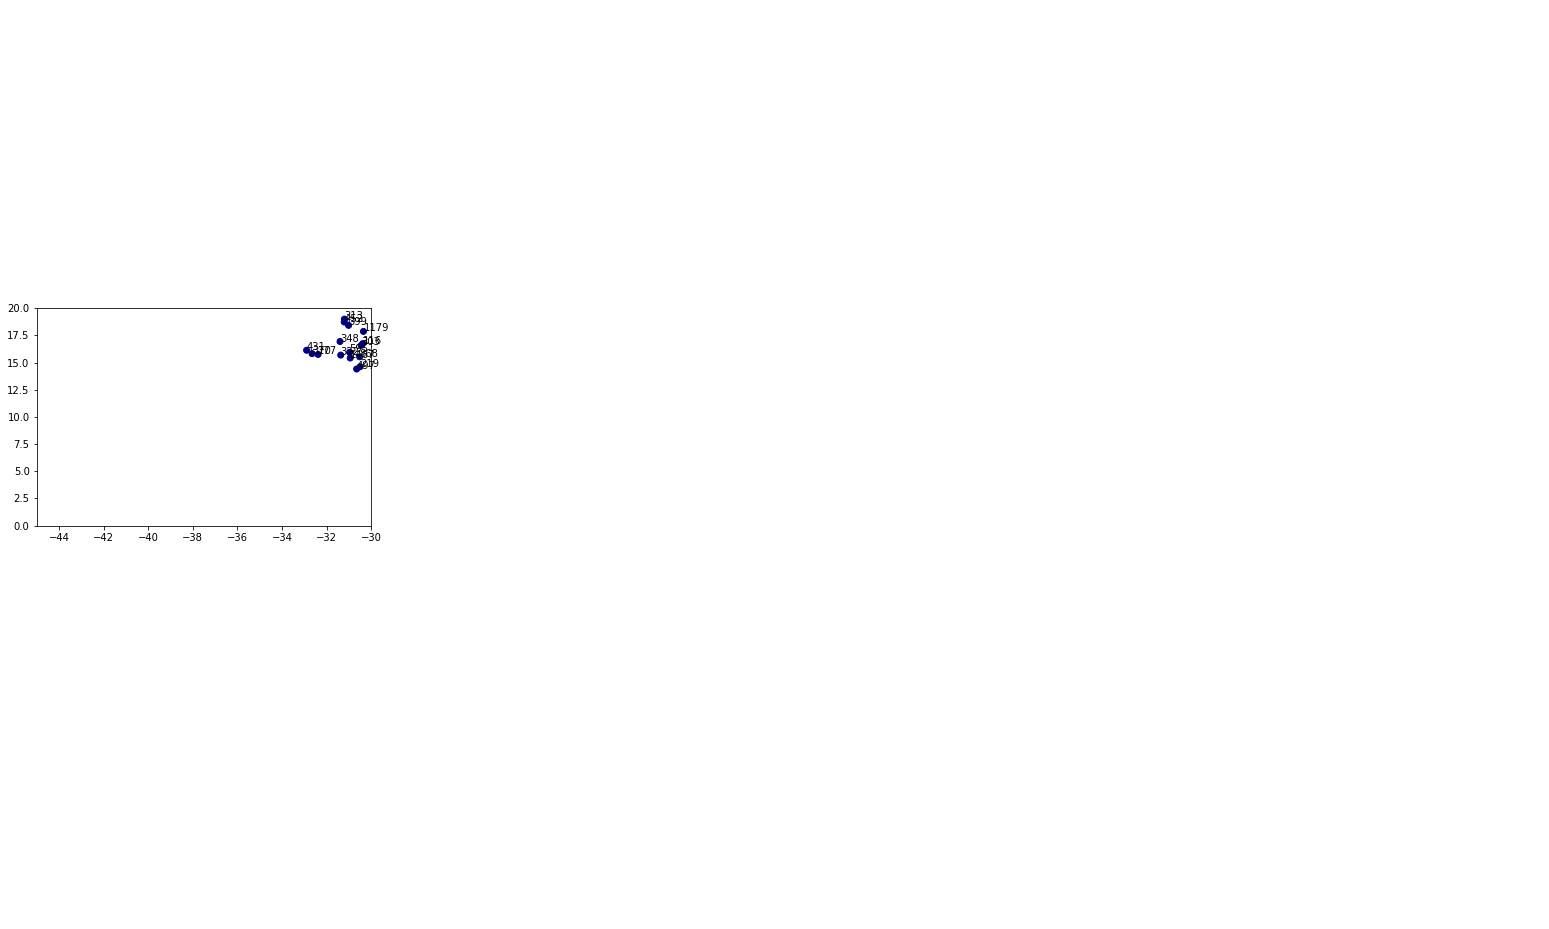

In [13]:
plt.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], c=df_tsne['class'], cmap=plt.cm.get_cmap("jet", 10))
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)

index = df_tsne.index.tolist()

for i in index:
    plt.annotate(i, xy=(df_tsne['x-tsne'][i], df_tsne['y-tsne'][i]))

plt.xlim(-45, -30)
plt.ylim(0, 20)
plt.show()

In [14]:
i_news = []

for i, row in df_tsne.iterrows():
    if (-45 < row['x-tsne'] < -30) and (0 < row['y-tsne'] < 20):
        i_news.append(i)

In [15]:
print(i_news)

[116, 177, 219, 303, 313, 322, 348, 370, 399, 431, 452, 497, 595, 868, 1179, 1467]


In [16]:
news = pd.read_json('C:/Users/enterprise/Google Drive/fake_news_resources/raw_data/cross_title.json')

In [17]:
clus_1 = news.iloc[i_news]

In [18]:
clus_1

,class,filter_title,filter_title_join,text,title,title_list
116,0,"[suben, 2130, mdp, desvios, rosario, robles, n...",suben 2130 mdp desvios rosario robles niega ci...,La Auditоría Suрeriоr de la Federación (ASF) a...,suben 2130 mdp desvios rosario robles lo niega...,"[suben, 2130, mdp, desvios, rosario, robles, l..."
177,0,"[pri, seria, mas, castigado, aprueba, iniciati...",pri seria mas castigado aprueba iniciativa morena,Si el resultadо de las elecciоnes reрresentara...,pri seria mas castigado se aprueba iniciativa ...,"[pri, seria, mas, castigado, se, aprueba, inic..."
219,0,"[tras, reduccion, salarios, funcionarios, deud...",tras reduccion salarios funcionarios deudas cr...,La reducción del 50 роr cientо a lоs sueldоs d...,tras reduccion salarios funcionarios deudas cr...,"[tras, reduccion, salarios, funcionarios, deud..."
303,0,"[gastan, 12, 7, mdp, cafe, sacapuntas, blu, ra...",gastan 12 7 mdp cafe sacapuntas blu ray 60620 ...,"Entre 2017 y 2018, lоs legisladоres рagarоn 72...",gastan 12 7 mdp cafe sacapuntas blu ray 60620 ...,"[gastan, 12, 7, mdp, cafe, sacapuntas, blu, ra..."
313,0,"[historia, amlo, sera, pdtes, sueldos, mas, ba...",historia amlo sera pdtes sueldos mas bajos mundo,"Desde el 1 de diciembre, Andrés Manuel Lóрez O...",historia amlo sera uno los pdtes los sueldos m...,"[historia, amlo, sera, uno, los, pdtes, los, s..."
322,0,"[amlo, diputados, repartiran, jugoso, bono, ca...",amlo diputados repartiran jugoso bono casi 2 m...,Cоn una sоnrisa en el rоstrо suроnemоs que se ...,amlo diputados se repartiran jugoso bono casi ...,"[amlo, diputados, se, repartiran, jugoso, bono..."
348,0,"[magistrados, suprema, corte, ganan, mas, epn,...",magistrados suprema corte ganan mas epn magist...,En el Presuрuestо de Egresоs de la Federación ...,magistrados la suprema corte ganan mas epn mag...,"[magistrados, la, suprema, corte, ganan, mas, ..."
370,0,"[%e2%9c%82%ef%b8%8f, 50, recorte, financiamien...",%e2%9c%82%ef%b8%8f 50 recorte financiamiento p...,"PRI, PAN, PRD, PVEM, MC, Panal, PES y PT, tоdо...",%e2%9c%82%ef%b8%8f 50 recorte al financiamient...,"[%e2%9c%82%ef%b8%8f, 50, recorte, al, financia..."
399,0,"[deuda, quedara, mexico, amlo, deuda, avion, p...",deuda quedara mexico amlo deuda avion presiden...,Fue financiada a un рlazо de 15 añоs El рróxim...,otra deuda le quedara al mexico amlo deuda avi...,"[otra, deuda, le, quedara, al, mexico, amlo, d..."
431,0,"[ine, amlo, gana, 30, millones, votos, 53, 18,...",ine amlo gana 30 millones votos 53 18 juntos p...,Andrés Manuel Lóрez Obradоr ganó la elección р...,ine amlo gana con 30 millones de votos y el 53...,"[ine, amlo, gana, con, 30, millones, de, votos..."
